In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
files.upload()


Saving Social_Network_Ads.csv to Social_Network_Ads.csv


{'Social_Network_Ads.csv': b'User ID,Gender,Age,EstimatedSalary,Purchased\r\n15624510,Male,19,19000,0\r\n15810944,Male,35,20000,0\r\n15668575,Female,26,43000,0\r\n15603246,Female,27,57000,0\r\n15804002,Male,19,76000,0\r\n15728773,Male,27,58000,0\r\n15598044,Female,27,84000,0\r\n15694829,Female,32,150000,1\r\n15600575,Male,25,33000,0\r\n15727311,Female,35,65000,0\r\n15570769,Female,26,80000,0\r\n15606274,Female,26,52000,0\r\n15746139,Male,20,86000,0\r\n15704987,Male,32,18000,0\r\n15628972,Male,18,82000,0\r\n15697686,Male,29,80000,0\r\n15733883,Male,47,25000,1\r\n15617482,Male,45,26000,1\r\n15704583,Male,46,28000,1\r\n15621083,Female,48,29000,1\r\n15649487,Male,45,22000,1\r\n15736760,Female,47,49000,1\r\n15714658,Male,48,41000,1\r\n15599081,Female,45,22000,1\r\n15705113,Male,46,23000,1\r\n15631159,Male,47,20000,1\r\n15792818,Male,49,28000,1\r\n15633531,Female,47,30000,1\r\n15744529,Male,29,43000,0\r\n15669656,Male,31,18000,0\r\n15581198,Male,31,74000,0\r\n15729054,Female,27,137000,1\r\n1

In [0]:
data = pd.read_csv("Social_Network_Ads.csv")

In [6]:
data.shape

(400, 5)

In [8]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [9]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [11]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [13]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [17]:
data["Purchased"].value_counts(normalize=True)

0    0.6425
1    0.3575
Name: Purchased, dtype: float64

In [18]:
data["Age"].min()

18

In [19]:
data["Age"].max()

60

In [20]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [21]:
data.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


In [0]:
#label encoding
#machine may take it as continous values so select one hot encoding

In [0]:
#perform onehot encoding for gender 
data1 = pd.get_dummies(data["Gender"],prefix="Gender")

In [25]:
#concatinate data and data1
data2 = pd.concat((data,data1),axis = 1)
data2

,User ID,Gender,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,Male,19,19000,0,0,1
1,15810944,Male,35,20000,0,0,1
2,15668575,Female,26,43000,0,1,0
3,15603246,Female,27,57000,0,1,0
4,15804002,Male,19,76000,0,0,1
...,...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,1,0
396,15706071,Male,51,23000,1,0,1
397,15654296,Female,50,20000,1,1,0
398,15755018,Male,36,33000,0,0,1


In [0]:
data2.drop("Gender",axis=1,inplace=True)

In [27]:
data2.columns

Index(['User ID', 'Age', 'EstimatedSalary', 'Purchased', 'Gender_Female',
       'Gender_Male'],
      dtype='object')

In [29]:
data2.corr()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
User ID,1.000000,-0.000721,0.071097,0.007120,0.025249,-0.025249
Age,-0.000721,1.000000,0.155238,0.622454,0.073741,-0.073741
EstimatedSalary,0.071097,0.155238,1.000000,0.362083,0.060435,-0.060435
Purchased,0.007120,0.622454,0.362083,1.000000,0.042469,-0.042469
Gender_Female,0.025249,0.073741,0.060435,0.042469,1.000000,-1.000000
Gender_Male,-0.025249,-0.073741,-0.060435,-0.042469,-1.000000,1.000000


In [0]:
X = data2[["Age","EstimatedSalary"]]

In [0]:
y = data2["Purchased"]

In [40]:
X.shape

(400, 2)

In [42]:
y.shape

(400,)

In [0]:
#split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,test_size=0.3)

In [72]:
X_train.shape

(280, 2)

In [73]:
y_test.shape

(120,)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',p=2)
classifier.fit(X_train,y_train)
y_predknn = classifier.predict(X_test)


In [75]:
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,precision_score,f1_score
print(confusion_matrix(y_test,y_predknn))

[[69  4]
 [18 29]]


In [76]:
print(accuracy_score(y_test,y_predknn))

0.8166666666666667


In [77]:
print(recall_score(y_test,y_predknn))

0.6170212765957447


In [78]:
print(precision_score(y_test,y_predknn))

0.8787878787878788


In [79]:
print(f1_score(y_test,y_predknn))

0.7250000000000001


In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predknn))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86        73
           1       0.88      0.62      0.73        47

    accuracy                           0.82       120
   macro avg       0.84      0.78      0.79       120
weighted avg       0.83      0.82      0.81       120



In [0]:
metric_k = []
neighbor = np.arange(3,15)


In [0]:
for k in neighbor:
  classifier = KNeighborsClassifier(n_neighbors=k,metric="minkowski",p=2)
  classifier.fit(X_train,y_train)
  y_predknn1 = classifier.predict(X_test)
  acc = accuracy_score(y_test,y_predknn1)
  metric_k.append(acc)
  

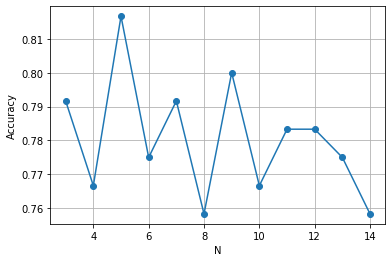

In [86]:
plt.plot(neighbor,metric_k,'o-')
plt.xlabel("N")
plt.ylabel("Accuracy")
plt.grid()

In [0]:
#scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [98]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan',p=2)
classifier.fit(X_train,y_train)
y_predknnscale = classifier.predict(X_test)
print("Accuraccy is ",accuracy_score(y_test,y_predknnscale))

Accuraccy is  0.9333333333333333
